In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config
from src.trading_evaluation.model_evaluation import evaluate_and_plot
from src.trading_evaluation.granger_causality import granger_causality_tests


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc_original.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth_original.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
y_pred_btc = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
y_pred_eth = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "multi_source_data"
    / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# slice original df with index of pred
df_btc = df_btc.loc[y_pred_btc.index]
df_eth = df_eth.loc[y_pred_eth.index]

In [14]:
df_btc.index

DatetimeIndex(['2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30',
               ...
               '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-17',
               '2022-12-18', '2022-12-19'],
              dtype='datetime64[ns]', name='date', length=314, freq=None)

# Model Evaluation


BTC - MSE: 0.0014
BTC - MAE: 0.0253


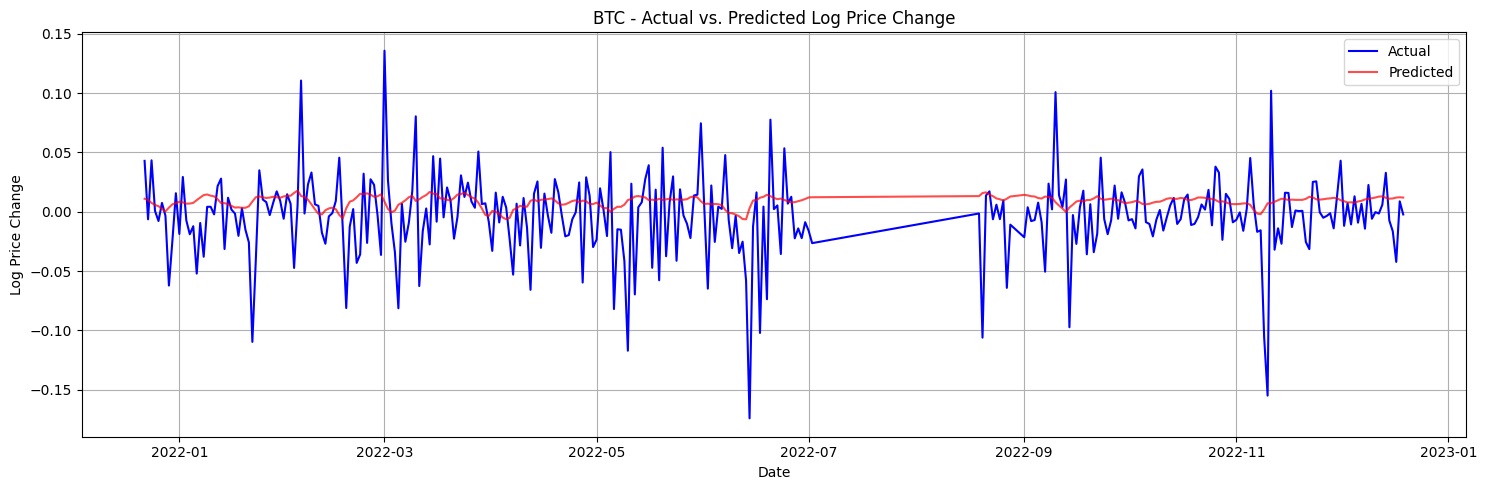

ETH - MSE: 0.0019
ETH - MAE: 0.0306


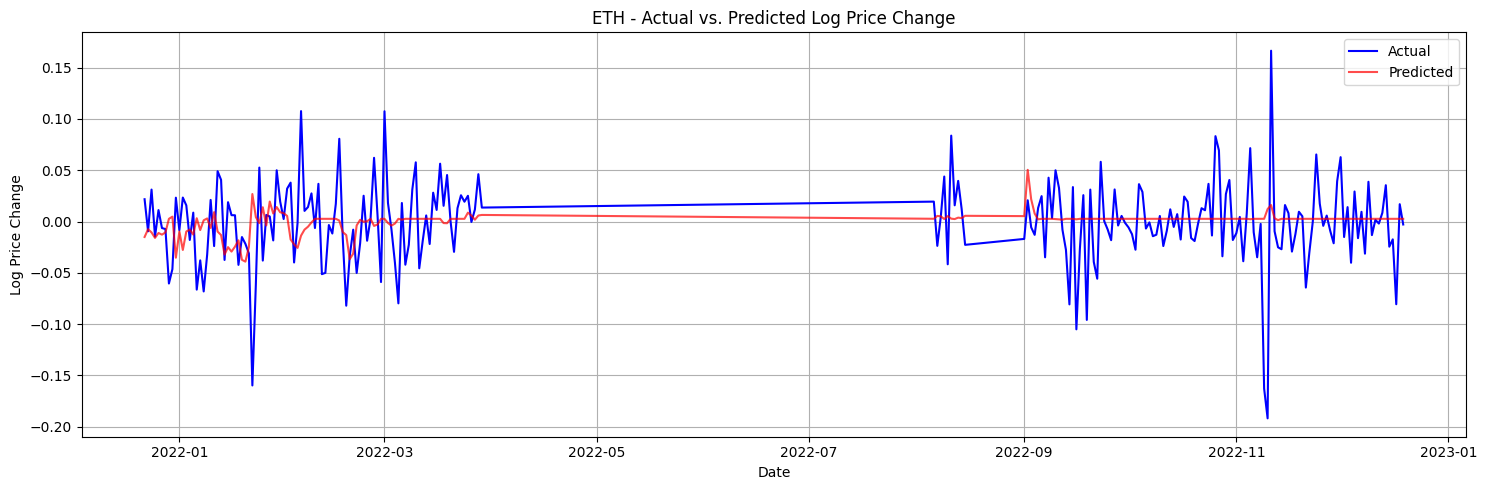

In [3]:
mse_btc, mae_btc = evaluate_and_plot(
    df_btc, y_pred_btc, "logPriceChange", "predictedLogPriceChange", "BTC"
)
mse_eth, mae_eth = evaluate_and_plot(
    df_eth, y_pred_eth, "logPriceChange", "predictedLogPriceChange", "ETH"
)

## Granger Causality

in order to understand which feature was more "influential" to the target, we'll look at how much each feature's history causes changes in the target

In [4]:
granger_results_btc = granger_causality_tests(
    df_btc, "BTC", "logPriceChange", max_lag=30
)
granger_results_eth = granger_causality_tests(
    df_eth, "ETH", "logPriceChange", max_lag=30
)


Granger Causality Test for BTC 'logPriceChange's
--------------------------------------------------
✗ open (best p=5.59e-01)
✗ high (best p=6.95e-01)
✗ low (best p=5.20e-01)
✗ close (best p=6.08e-01)
✗ volume (best p=7.48e-02)
✗ marketCap (best p=6.06e-01)
✗ EMA_12 (best p=6.82e-01)
✗ EMA_26 (best p=7.67e-01)
✗ BB_Middle (best p=7.11e-01)
✗ BB_Upper (best p=4.15e-01)
✗ BB_Lower (best p=4.64e-01)
✗ OBV (best p=2.87e-01)
✗ KAMA (best p=3.72e-01)
✗ PPO (best p=2.50e-01)
✗ PPO_Signal (best p=3.85e-01)
✗ PVO (best p=8.02e-02)
✗ PVO_Signal (best p=2.50e-01)
✓ RSI (lag 3, p=1.78e-02)
✗ TSI (best p=2.67e-01)
✗ Ultimate_Oscillator (best p=1.05e-01)
✗ ADI (best p=5.82e-01)
✗ CMF (best p=5.30e-01)
✗ EMV (best p=1.11e-01)
✗ FI (best p=8.71e-01)
✗ NVI (best p=4.18e-01)
✗ VPT (best p=1.65e-01)
✗ BBM (best p=6.66e-01)
✗ BBW (best p=1.09e-01)
✗ DCM (best p=7.60e-01)
✗ DCW (best p=4.58e-01)
✗ KCM (best p=7.53e-01)
✗ KCW (best p=7.46e-01)
✗ UI (best p=1.05e-01)
✗ Aroon_down (best p=7.23e-02)
✓ Aroon_up